In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(image):
    if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[-1] == 1):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Rysowanie kształtów


### Rysowanie prostej

Aby narysować linię, musisz podać współrzędne początkowe i końcowe linii. Utwórzmy czarny obrazek i narysujemy na nim niebieską linię od lewego górnego do prawego dolnego rogu. Wykorzystamy do tego metodę __cv2.line()__. Przyjmuje ona trzy argumenty:
- Obraz źródłowy
- Kolor linii w formacie RGB
- Grubość linii w pikselach.

[dokumentacja](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#line)

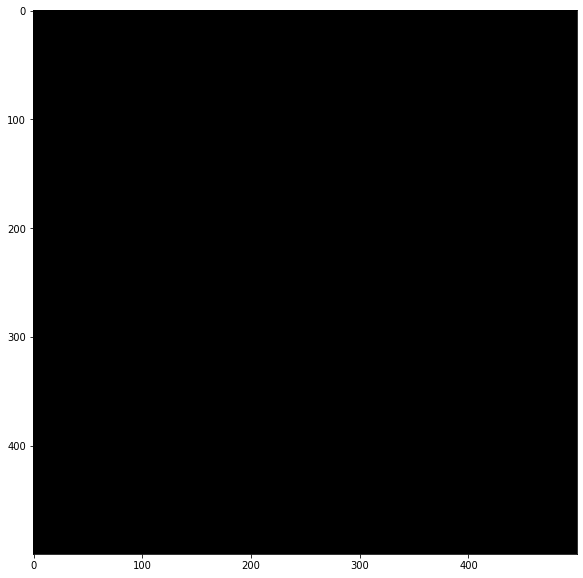

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)

image = np.zeros((500, 500, 3), np.uint8)
imshow(image)

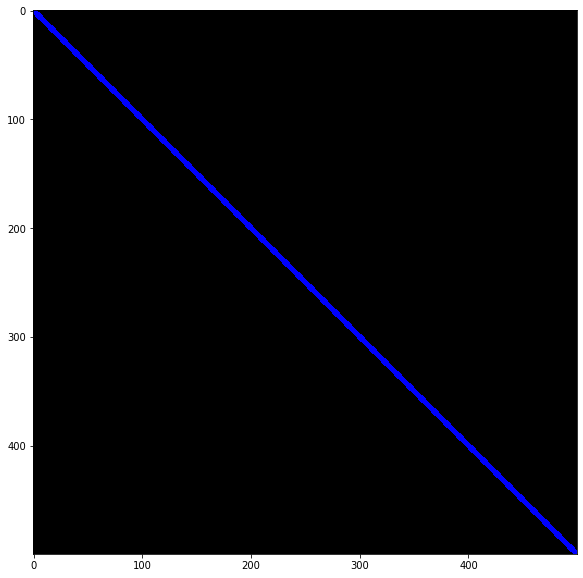

In [3]:
cv2.line(image, 
         pt1=(0,0), 
         pt2=(499, 499),
         color=(255, 0, 0),
         thickness=4)
imshow(image)

### Rysowanie prostokąta
Do narysowania prostokąta potrzebny jest lewy górny róg i prawy dolny róg prostokąta. Tym razem narysujemy zielony prostokąt w prawym górnym rogu obrazu.

[dokumentacja](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#rectangle)

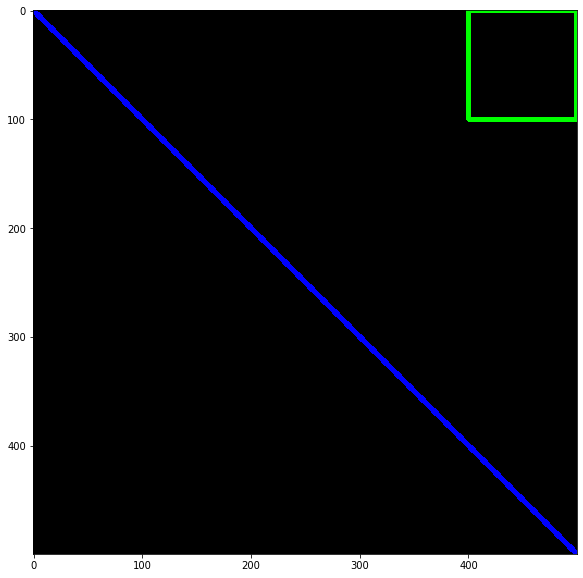

In [4]:
cv2.rectangle(image, (400,0), (499,100),
              color=(0,255,0),
              thickness=3)  # ujemna da zakolorowany prostokąt
imshow(image)

Aby narysować okrąg, potrzebujesz jego współrzędnych środkowych i promienia. Narysujemy okrąg wewnątrz prostokąta narysowanego powyżej.

[dokumentacja](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#circle)

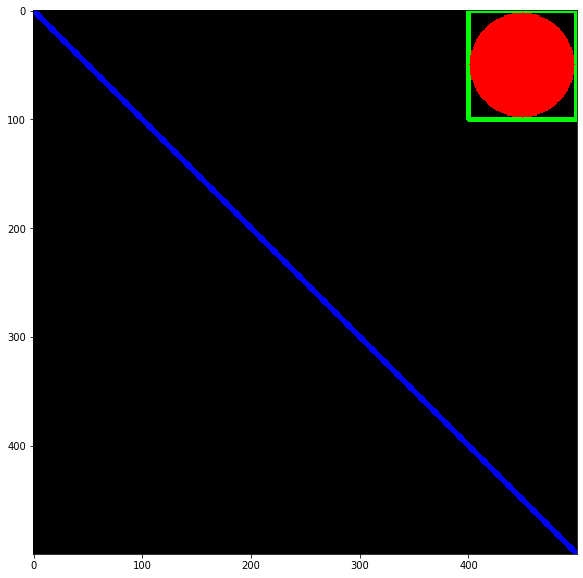

In [5]:
cv2.circle(image, (449, 50), 48,
           color=(0,0,255),
           thickness=-1)
imshow(image)

### Rysunek wielokąta
Aby narysować wielokąt, najpierw potrzebujesz współrzędnych wierzchołków. Zrób z tych punktów tablicę kształtu ROWSx1x2, gdzie ROWS są liczbą wierzchołków i powinny być typu int32. Tutaj narysujemy łamaną z czterema wierzchołkami w kolorze żółtym.

[dokumentacja](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#polylines)

[[[200 300]]

 [[250 350]]

 [[200 400]]

 [[150 350]]]


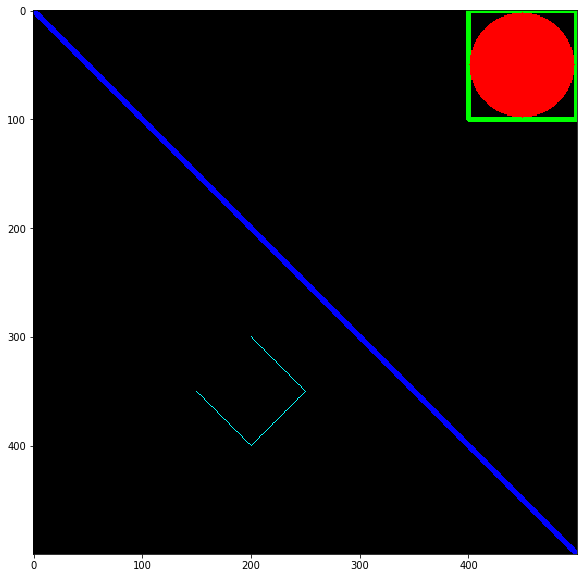

In [6]:
pts = np.array([[200, 300], [250,350], [200,400], [150,350]], np.int32)
pts = pts.reshape((-1, 1, 2))
print(pts)
cv2.polylines(image, 
              pts=[pts],
              isClosed=False,
              color=(255,255,0),
              thickness=1)
imshow(image)

Jeśli trzecim argumentem jest False, otrzymasz linie łączące wszystkie punkty, a nie zamknięty kształt. Gdy zmienimy wartość trzeciego argumentu na True, otrzymamy zamknięty kształt

cv2.polylines() może być użyty do narysowania wielu linii. Wystarczy utworzyć listę wszystkich linii, które chcesz narysować i przekazać ją funkcji. Wszystkie linie zostaną narysowane indywidualnie. Jest to znacznie lepszy i szybszy sposób na narysowanie grupy linii niż wywołanie cv.line() dla każdej linii.

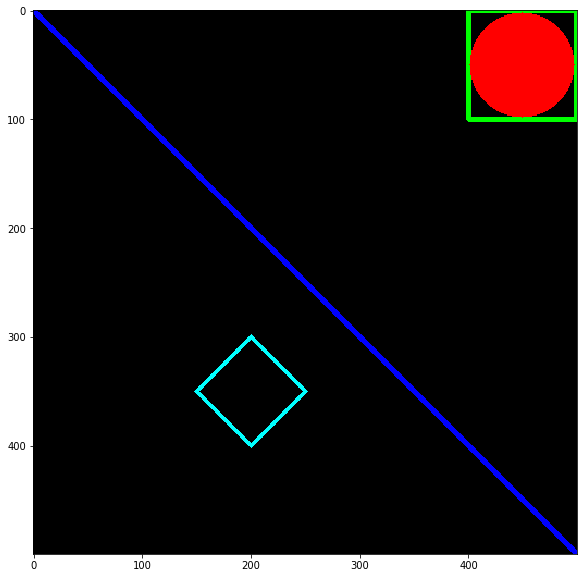

In [7]:
cv2.polylines(image, 
              pts=[pts],
              isClosed=True,
              color=(255,255,0),
              thickness=3)
imshow(image)

### Nakładanie tekstu
Aby umieścić teksty w obrazach korzystamy z funkcji __putText__ z parametrami:

- Tekst, który chcesz zapisać
- Współrzędne pozycji w miejscu, w którym chcesz je umieścić (tj. w lewym dolnym rogu pola tekstowego).
- Typ czcionki 
- Skala czcionki (określa wielkość czcionki)
- standardowe rzeczy, takie jak kolor, grubość, typ linii itp. Dla lepszego wyglądu zalecany jest  lineType = cv.LINE_AAA.

[dokumentacja](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#puttext)

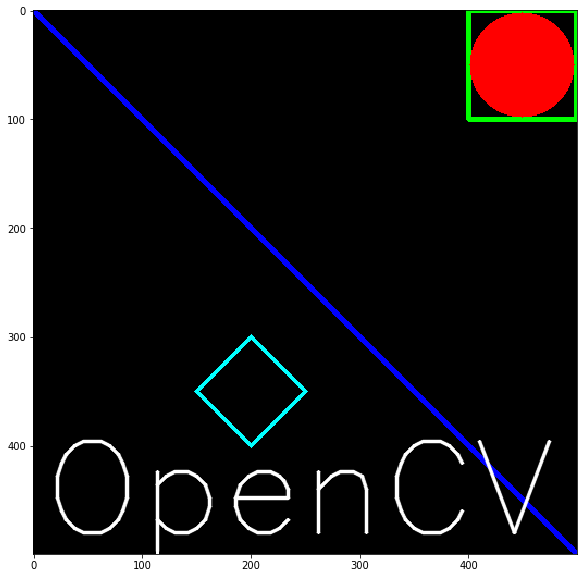

In [8]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,
            text='OpenCV',
            org=(10,480),
            fontFace=font,
            fontScale=4,
            color=(255,255,255),
            thickness=2,
            lineType=cv2.LINE_AA)
imshow(image)

### Zadanie 1
Utwórz biały pusty obraz o wymiarach 300 x 300

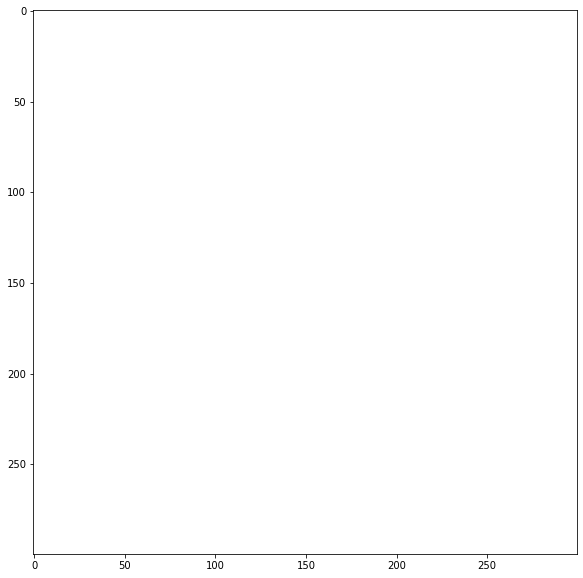

In [20]:
image = 255 * np.ones((300, 300, 3), dtype=np.uint8)
imshow(image)

### Zadanie 2
Narysuj __pionową__ prostą czarną prostą zaczynając od 50px z lewej strony co 100px o grubości 2px


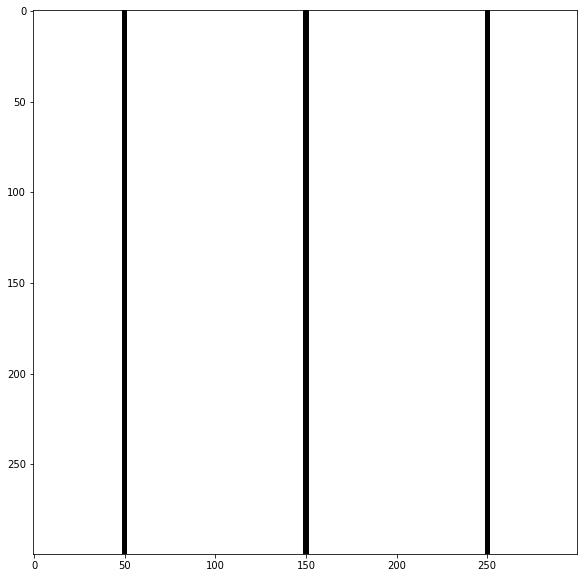

In [21]:
for i in range(50, 300, 100):
    cv2.line(image, 
         pt1=(i, 0), 
         pt2=(i, 299),
         color=(0, 0, 0),
         thickness=2)
imshow(image)

### Zadanie 3
Narysuj żółty okrąg na środku obrazu o promieniu 30 i grubości linii 3px


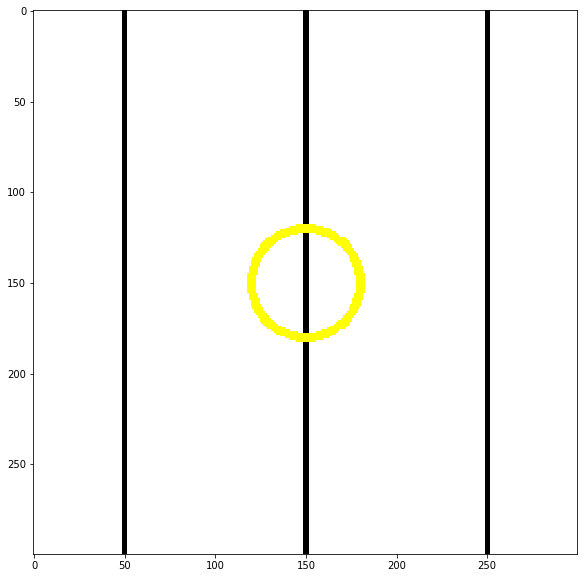

In [22]:
cv2.circle(image, (150, 150), 30,
           color=(0,255,255),
           thickness=3)
imshow(image)

### Zadanie 4
Dodaj napis o treści "Python AGH" w lewym dolnym rogu. Dobierz grubość, kolor i wielkość czcionki tak, aby był czytelny.


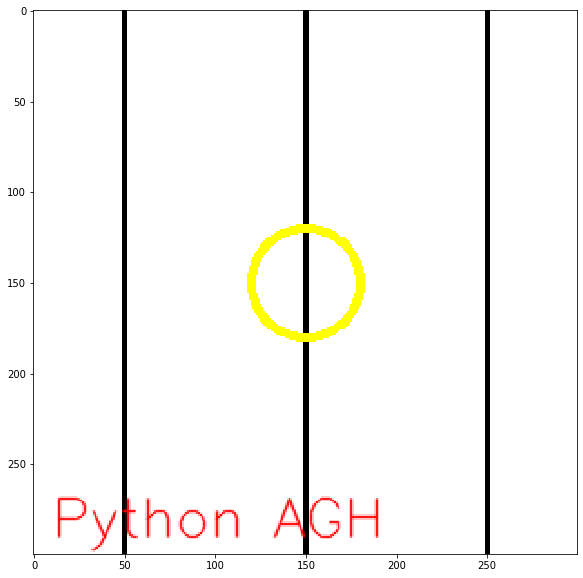

In [23]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,
            text='Python AGH',
            org=(10,290),
            fontFace=font,
            fontScale=1,
            color=(0, 0, 255),
            thickness=1,
            lineType=cv2.LINE_AA)
imshow(image)


### Zadanie 5
Narysuj w dowolnym miejscu sześciokąt foremny, żeby był widoczny wykorzystując funkcję cv2.polylines

[[[100 100]]

 [[120 100]]

 [[130  83]]

 [[120  64]]

 [[100  64]]

 [[ 90  83]]]


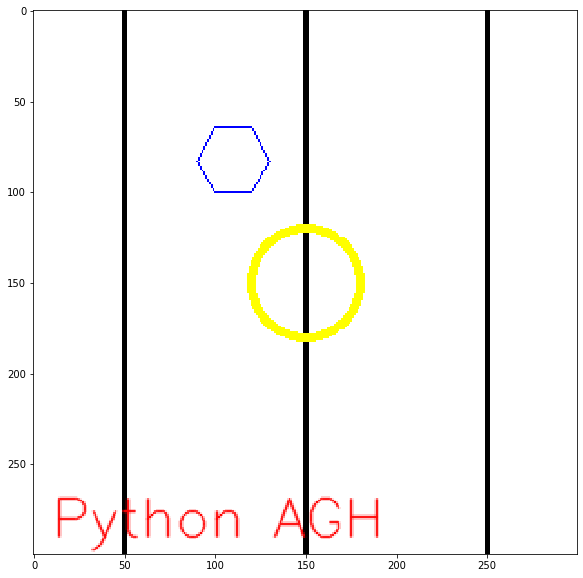

In [24]:
pts = np.array([[[100, 100], [120, 100], [130, 83], [120, 64], [100, 64], [90, 83]]], np.int32)
pts = pts.reshape((-1, 1, 2))
print(pts)
cv2.polylines(image, 
              pts=[pts],
              isClosed=True,
              color=(255,0,0),
              thickness=1)
imshow(image)